In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [100]:
import seaborn as sns
sns.set_style("whitegrid")

In [101]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min.fea')

In [102]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [103]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [104]:
predictor_columns = [ 'cj_living_area',
       'avmValue', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale']

In [105]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [106]:
Predictors.shape

(626428, 19)

In [107]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [108]:
predictand.shape

(626428,)

In [109]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [110]:
X_train.shape

(200000, 19)

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [206]:
mlp_regressor = make_pipeline(
                                MinMaxScaler(feature_range=(-3,3)),
                                MLPRegressor(
                                    hidden_layer_sizes=(14,4),
                                    activation = ('relu'),
                                    early_stopping = False,
                                    random_state = 0,
                                    batch_size=50,
                                    tol=0.002,
                                    max_iter=300,
                                ),
                        )

In [207]:
mlp_model = mlp_regressor.fit(X_train, y_train)

In [208]:
predictions_test = mlp_model.predict(X_test)
predictions_train = mlp_model.predict(X_train)
predictions = mlp_model.predict(Predictors)

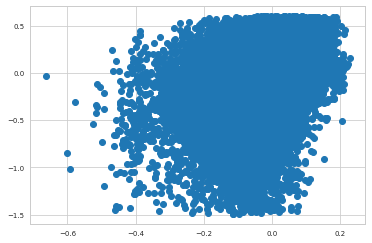

In [209]:
plt.plot(predictions_train,y_train,'o')

In [198]:
predictions_train.shape

(200000,)

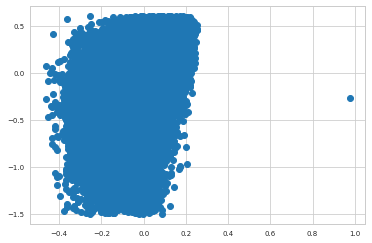

In [199]:
plt.plot(predictions_test,y_test,'o')

In [200]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [201]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
predictions_test_value2 = df['avmValue'].values/(1-predictions)

In [202]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))

0.11902250817522157
0.12362300668830177


In [203]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))

0.12221301930062328
0.12655919563081403


In [183]:
import joblib
filename = 'NN_newmodel_01.sav'
joblib.dump(mlp_model,filename)

['NN_newmodel_01.sav']